<a href="https://colab.research.google.com/github/buttivaishnavi/CBIT-WinterUpskilling/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Simulate a dataset for Classification with 3 Labels, 6 attributes with interaction among them,
10000 instances and use Uniform random function

In [ ]:
import numpy as np
import pandas as pd
np.random.seed(42)
num_instances=1000
num_attributes=6
num_labels=3
att=np.random.uniform(0,1,(num_instances,num_attributes))
labels=[]
for i in range(num_instances):
    if att[i,0]+att[i,1]>1:
        labels.append(0)
    elif att[i,2]+att[i,3]>1:
        labels.append(1)
    else:
        labels.append(2)
df=pd.DataFrame(att, columns=[f'Attribute_{i+1}' for i in range(num_attributes)])
df['Label']=labels
print(df.head())

   Attribute_1  Attribute_2  Attribute_3  Attribute_4  Attribute_5  \
0     0.374540     0.950714     0.731994     0.598658     0.156019   
1     0.058084     0.866176     0.601115     0.708073     0.020584   
2     0.832443     0.212339     0.181825     0.183405     0.304242   
3     0.431945     0.291229     0.611853     0.139494     0.292145   
4     0.456070     0.785176     0.199674     0.514234     0.592415   

   Attribute_6  Label  
0     0.155995      0  
1     0.969910      1  
2     0.524756      0  
3     0.366362      2  
4     0.046450      0  


2.Simulate a dataset for Clustering 6 attributes with interaction among them, 10000 instances and
use normal random function

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)
num_instances = 10000
num_attributes = 6
mean = 0
std_dev = 1
att = np.random.normal(mean, std_dev, (num_instances, num_attributes))
att[0:2500, 0] += 3
att[2500:5000, 1] += 3
att[5000:7500, 2] += 3
att[7500:10000, 3] += 3
df = pd.DataFrame(att, columns=[f'Attribute_{i+1}' for i in range(num_attributes)])
print(df.head())

   Attribute_1  Attribute_2  Attribute_3  Attribute_4  Attribute_5  \
0     3.496714    -0.138264     0.647689     1.523030    -0.234153   
1     4.579213     0.767435    -0.469474     0.542560    -0.463418   
2     3.241962    -1.913280    -1.724918    -0.562288    -1.012831   
3     2.091976    -1.412304     1.465649    -0.225776     0.067528   
4     2.455617     0.110923    -1.150994     0.375698    -0.600639   

   Attribute_6  
0    -0.234137  
1    -0.465730  
2     0.314247  
3    -1.424748  
4    -0.291694  


3.Simulate a dataset for regression 6 attributes with interaction among them, 10000 instances and
use normal random function

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

np.random.seed(42)
num_instances = 10000
num_attributes = 6
mean = 0
std_dev = 1
att = np.random.normal(mean, std_dev, (num_instances, num_attributes))
target = 3 * att[:, 0] + 2 * att[:, 1] - 1.5 * att[:, 2] + 0.5 * att[:, 3] + np.random.normal(0, 0.5, num_instances)
df = pd.DataFrame(att, columns=[f'Attribute_{i+1}' for i in range(num_attributes)])
df['Target'] = target
print(df.head())
df.to_csv("simulated_regression_dataset.csv", index=False)
files.download("simulated_regression_dataset.csv")

   Attribute_1  Attribute_2  Attribute_3  Attribute_4  Attribute_5  \
0     0.496714    -0.138264     0.647689     1.523030    -0.234153   
1     1.579213     0.767435    -0.469474     0.542560    -0.463418   
2     0.241962    -1.913280    -1.724918    -0.562288    -1.012831   
3    -0.908024    -1.412304     1.465649    -0.225776     0.067528   
4    -0.544383     0.110923    -1.150994     0.375698    -0.600639   

   Attribute_6    Target  
0    -0.234137  1.043015  
1    -0.465730  7.529448  
2     0.314247 -0.623890  
3    -1.424748 -8.498998  
4    -0.291694  0.409926  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4.Build a Non Linear Regression model and get 90% Accuracy for the above simulated data in
question2. Split the data into 70% and 30% respectively for Training and Testing for model
building

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/simulated_regression_dataset.csv')
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')
if r2 >= 0.90:
    print("Achieved 90% accuracy!")
else:
    print("Did not achieve 90% accuracy.")

Mean Squared Error: 0.49513975468941135
R2 Score: 0.9675419566727835
Achieved 90% accuracy!


5.Build any five Classifiers for the above dataset in question1 and compare the metrics of these built
models. Metrics need to build are Accuracy, Precision, Recall, F1Score. Split the data into 70%
and 30% respectively for Training and Testing for model building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('simulated_regression_dataset.csv')
df['Target'] = pd.qcut(df['Target'], q=3, labels=[0, 1, 2])
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Support Vector Classifier': SVC(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}
metrics = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    metrics[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)

                           Accuracy  Precision    Recall  F1 Score
Random Forest              0.900000   0.900043  0.900000  0.900017
K-Nearest Neighbors        0.848667   0.852636  0.848667  0.849942
Logistic Regression        0.927000   0.926750  0.927000  0.926809
Support Vector Classifier  0.914333   0.914177  0.914333  0.914244
Decision Tree              0.847000   0.846209  0.847000  0.846420


6.Load CSV, EXCEL, EXCELS, JSON format datasets from local host and Websites into Colab
interface and split them into Train and test data

In [ ]:
import pandas as pd
import json
from sklearn.model_selection import train_test_split

csv_data = pd.read_csv('/content/hw_200.csv')
csv_url_data = pd.read_csv('https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv')

excel_data = pd.read_excel('/content/cities.xlsx')
excel_url_data = pd.read_excel('https://raw.githubusercontent.com/learn-co-students/excel-to-python-data-science-intro-000/master/cities.xlsx')

with open('/content/package.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame([data])
json_url_data = pd.read_json('https://raw.githubusercontent.com/buttivaishnavi/EAD_LAB_160122737074/main/package.json',  typ='series')
json_url_data = json_url_data.to_frame().T


print(csv_data.columns)
X = csv_data.drop('Index', axis=1)
y = csv_data['Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Index(['Index', ' Height(Inches)"', ' "Weight(Pounds)"'], dtype='object')
X_train shape: (140, 2)
X_test shape: (60, 2)
y_train shape: (140,)
y_test shape: (60,)


7.Load different datasets from SkLearn library into Colab interface and split them into train and
test data. Apply Normalization techniques to convert input data into standardize

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

wine = datasets.load_wine()
X_wine = wine.data
y_wine = wine.target

breast_cancer = datasets.load_breast_cancer()
X_breast_cancer = breast_cancer.data
y_breast_cancer = breast_cancer.target

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)
X_breast_cancer_train, X_breast_cancer_test, y_breast_cancer_train, y_breast_cancer_test = train_test_split(X_breast_cancer, y_breast_cancer, test_size=0.3, random_state=42)

scaler_standard = StandardScaler()
X_iris_train_standard = scaler_standard.fit_transform(X_iris_train)
X_iris_test_standard = scaler_standard.transform(X_iris_test)

scaler_minmax = MinMaxScaler()
X_wine_train_minmax = scaler_minmax.fit_transform(X_wine_train)
X_wine_test_minmax = scaler_minmax.transform(X_wine_test)

scaler_breast_cancer = StandardScaler()
X_breast_cancer_train_standard = scaler_breast_cancer.fit_transform(X_breast_cancer_train)
X_breast_cancer_test_standard = scaler_breast_cancer.transform(X_breast_cancer_test)

print("Iris Dataset Standardized:")
print("X_train shape:", X_iris_train_standard.shape)
print("X_test shape:", X_iris_test_standard.shape)

print("\nWine Dataset Min-Max Scaled:")
print("X_train shape:", X_wine_train_minmax.shape)
print("X_test shape:", X_wine_test_minmax.shape)

print("\nBreast Cancer Dataset Standardized:")
print("X_train shape:", X_breast_cancer_train_standard.shape)
print("X_test shape:", X_breast_cancer_test_standard.shape)

Iris Dataset Standardized:
X_train shape: (105, 4)
X_test shape: (45, 4)

Wine Dataset Min-Max Scaled:
X_train shape: (124, 13)
X_test shape: (54, 13)

Breast Cancer Dataset Standardized:
X_train shape: (398, 30)
X_test shape: (171, 30)


8.Load any data from website/Local host and apply the below data wrangling techniques

In [ ]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

a.split

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)


b. Merge

In [ ]:
merged_data = pd.merge(train_data, train_data, on='PassengerId', suffixes=('_left', '_right'))

c. Select rows by conditions

In [ ]:
survived_passengers = data[data['Survived'] == 1]

d. Select columns by conditions

In [ ]:
selected_columns = data[['Name', 'Age', 'Fare']]

e. Rename columns

In [ ]:
data.rename(columns={'Survived': 'Is_Survived', 'Pclass': 'Passenger_Class'}, inplace=True)

f. Min, max, avg, variance

In [ ]:
min_age = data['Age'].min()
max_age = data['Age'].max()
avg_age = data['Age'].mean()
age_variance = data['Age'].var()

g. Describe

In [ ]:
description = data.describe()

h. Size

In [ ]:
data_size = data.size

 i. Shape

In [ ]:
data_shape = data.shape

j. Find unique values

In [ ]:
unique_classes = data['Passenger_Class'].unique()

k. Find missing values and fill them with average value/mode value

In [ ]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

<ipython-input-65-5642c1777132>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


 l. Replace attribute value name with other name

In [ ]:
data['Sex'].replace({'male': 'Male', 'female': 'Female'}, inplace=True)

<ipython-input-64-c3deefe4712b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sex'].replace({'male': 'Male', 'female': 'Female'}, inplace=True)


m. Delete columns

In [ ]:
data.drop(columns=['Ticket', 'Cabin'], inplace=True)

n. Delete some rows

In [ ]:
data = data[data['Age'] >= 1]

o. Join datasets

In [ ]:
joined_data = pd.merge(data, data, on='PassengerId', how='left')

p. Group values by rows

In [ ]:
grouped_data = data.groupby('Is_Survived').size()


q. Loop over columns


In [ ]:
for column in data.columns:
    print(f"Column: {column}, Unique Values: {data[column].unique()}")

Column: PassengerId, Unique Values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 23

s. Concatenating datasets

In [ ]:
concatenated_data = pd.concat([train_data, train_data])

t. Append rows

In [ ]:
appended_data = train_data.append(test_data, ignore_index=True)

u. Append columns

In [ ]:
data['New_Column'] = np.random.rand(data.shape[0])

v. Reorder columns

In [ ]:
data = data[['PassengerId', 'Is_Survived', 'Passenger_Class', 'Name', 'Age', 'Fare', 'New_Column']]

In [ ]:
print("Merged Data Shape:", merged_data.shape)
print("Survived Passengers Count:", survived_passengers.shape[0])
print("Selected Columns:\n", selected_columns.head())
print("Description:\n", description)
print("Unique Classes:", unique_classes)
print("Data Shape After Deletion:", data.shape)

Merged Data Shape: (623, 23)
Survived Passengers Count: 342
Selected Columns:
                                                 Name   Age     Fare
0                            Braund, Mr. Owen Harris  22.0   7.2500
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0  71.2833
2                             Heikkinen, Miss. Laina  26.0   7.9250
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0  53.1000
4                           Allen, Mr. William Henry  35.0   8.0500
Description:
        PassengerId  Is_Survived  Passenger_Class         Age       SibSp  \
count   891.000000   891.000000       891.000000  714.000000  891.000000   
mean    446.000000     0.383838         2.308642   29.699118    0.523008   
std     257.353842     0.486592         0.836071   14.526497    1.102743   
min       1.000000     0.000000         1.000000    0.420000    0.000000   
25%     223.500000     0.000000         2.000000   20.125000    0.000000   
50%     446.000000     0.000000         3.0

9.Load the Images and audio files. Covert audio file into spectrogram. Apply it for a length of one
minute telugu song. Convert a colour image into gray scale image

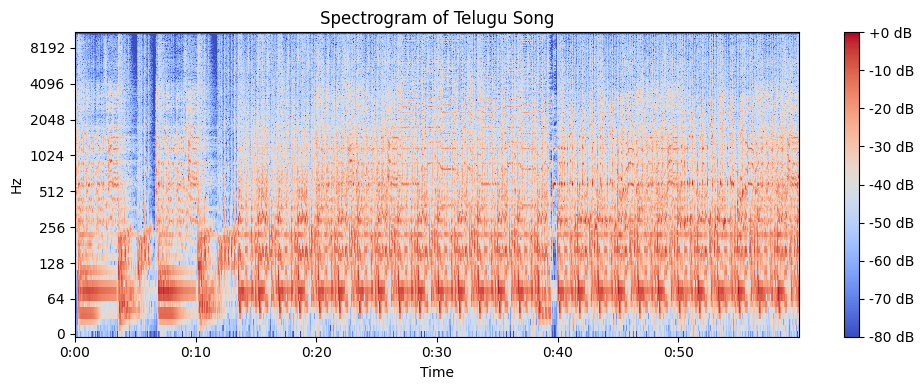

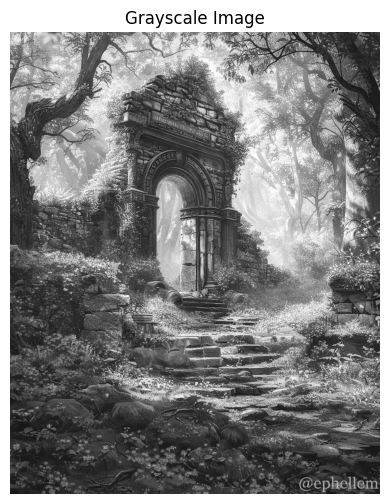

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from PIL import Image
audio_file = '/content/[iSongs.info] 03 - Namo Namah Shivaya.mp3'
y, sr = librosa.load(audio_file, duration=60)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Telugu Song')
plt.tight_layout()
plt.show()
image_file = '/content/Flowering ruins _ AI concept art environment _ @Ephellem.jpg'
color_image = Image.open(image_file)

gray_image = color_image.convert('L')
plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()

10.Load any numeric data and apply Ridge and Lasso regressions to get 90% accuracy

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd

auto_mpg = fetch_ucirepo(id=9)

X = pd.DataFrame(auto_mpg.data.features, columns=auto_mpg.data.feature_names)
y = auto_mpg.data.targets

imputer = SimpleImputer(strategy='mean')
X['horsepower'] = imputer.fit_transform(X[['horsepower']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("R^2 Score (ridge): {:.2f}%".format(r2_ridge * 100))

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("R^2 Score (lasso): {:.2f}%".format(r2_lasso * 100))

R^2 Score (ridge): 83.78%
R^2 Score (lasso): 83.79%


11. Load Digits dataset and apply clustering models to get its metrics


In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.metrics import silhouette_score

digits = datasets.load_digits()
X = digits.data

kmeans = KMeans(n_clusters=10, random_state=42).fit(X)
print(f"K-Means: Clusters: {kmeans.n_clusters}, Silhouette Score: {silhouette_score(X, kmeans.labels_):.4f}")

agglo = AgglomerativeClustering(n_clusters=10).fit(X)
print(f"Agglomerative: Clusters: {agglo.n_clusters}, Silhouette Score: {silhouette_score(X, agglo.labels_):.4f}")

dbscan = DBSCAN(eps=3, min_samples=5).fit(X)
dbscan_labels = dbscan.labels_
print(f"DBSCAN: Clusters: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}, Silhouette Score: {silhouette_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1:.4f}")

mean_shift = MeanShift().fit(X)
mean_shift_labels = mean_shift.labels_
print(f"Mean Shift: Clusters: {len(set(mean_shift_labels))}, Silhouette Score: {silhouette_score(X, mean_shift_labels) if len(set(mean_shift_labels)) > 1 else -1:.4f}")

K-Means: Clusters: 10, Silhouette Score: 0.1765
Agglomerative: Clusters: 10, Silhouette Score: 0.1785
DBSCAN: Clusters: 0, Silhouette Score: -1.0000
Mean Shift: Clusters: 1, Silhouette Score: -1.0000


12.Implement the techniques to handle imbalanced dataset to balanced dataset with binary class data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.9, 0.1], n_informative=3,
                           n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

print(f"Original dataset shape: {Counter(y)}")

ros = RandomOverSampler(random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X, y)
print(f"Random Oversampling dataset shape: {Counter(y_resampled_ros)}")

rus = RandomUnderSampler(random_state=42)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X, y)
print(f"Random Undersampling dataset shape: {Counter(y_resampled_rus)}")

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)
print(f"SMOTE dataset shape: {Counter(y_resampled_smote)}")

Original dataset shape: Counter({0: 900, 1: 100})
Random Oversampling dataset shape: Counter({0: 900, 1: 900})
Random Undersampling dataset shape: Counter({0: 100, 1: 100})
SMOTE dataset shape: Counter({0: 900, 1: 900})


13.Apply KNN classifier on appropriate data. Find best neighbourhood size, Indices of
neighbourhood, distances of neighbourhood by taking a random new tuple

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
param_grid = {'n_neighbors': np.arange(1, 21)}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_train, y_train)
best_k = grid.best_params_['n_neighbors']
print(f"Best number of neighbors: {best_k}")
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
random_index = np.random.randint(0, X_test.shape[0])
new_tuple = X_test[random_index].reshape(1, -1)
predicted_class = knn_best.predict(new_tuple)
print(f"Predicted class for the new tuple: {predicted_class[0]}")

distances, indices = knn_best.kneighbors(new_tuple)
print(f"Indices of neighbors: {indices.flatten()}")
print(f"Distances of neighbors: {distances.flatten()}")

Best number of neighbors: 1
Predicted class for the new tuple: 1
Indices of neighbors: [3]
Distances of neighbors: [0.14142136]


 14.Find support vectors and their probabilities by applying SVM on any binary classification dataset.
Also find the best model to generate support vectors. Get the metrics for this trained model.
Represent its graph also

Support Vectors:
[[1.881e+01 1.998e+01 1.209e+02 ... 1.294e-01 2.567e-01 5.737e-02]
 [1.427e+01 2.255e+01 9.377e+01 ... 1.362e-01 2.698e-01 8.351e-02]
 [1.245e+01 1.570e+01 8.257e+01 ... 1.741e-01 3.985e-01 1.244e-01]
 ...
 [1.499e+01 2.211e+01 9.753e+01 ... 1.308e-01 3.163e-01 9.251e-02]
 [1.785e+01 1.323e+01 1.146e+02 ... 8.341e-02 1.783e-01 5.871e-02]
 [1.314e+01 2.074e+01 8.598e+01 ... 1.181e-01 2.563e-01 8.174e-02]]
Support Vector Indices: [ 24  63  73  77  84  98 120 126 128 136 140 145 179 226 252 253 275 297
 307 341 346 352 356 378 384   2  10  15  25  79  87  92  94 103 123 146
 147 182 190 242 269 323 325 338 365 379 380 390]
Support Vector Probabilities:
[[0.38624868 0.61375132]
 [0.43332163 0.56667837]
 [0.63441204 0.36558796]
 [0.76132668 0.23867332]
 [0.83560472 0.16439528]
 [0.56569561 0.43430439]
 [0.59468685 0.40531315]
 [0.75720141 0.24279859]
 [0.84817568 0.15182432]
 [0.00960099 0.99039901]
 [0.76327402 0.23672598]
 [0.37968307 0.62031693]
 [0.77992    0.22008   ]


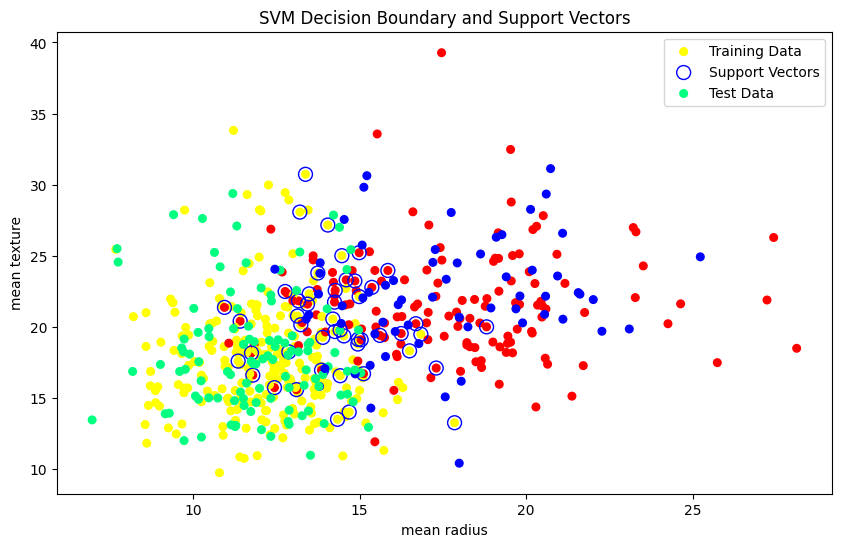

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

data = datasets.load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
support_vectors = svm_model.support_vectors_
support_vector_indices = svm_model.support_
support_vector_probabilities = svm_model.predict_proba(support_vectors)
print(f"Support Vectors:\n{support_vectors}")
print(f"Support Vector Indices: {support_vector_indices}")
print(f"Support Vector Probabilities:\n{support_vector_probabilities}")
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap='autumn', label='Training Data')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none', edgecolors='blue', s=100, label='Support Vectors')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=30, cmap='winter', label='Test Data')
plt.title('SVM Decision Boundary and Support Vectors')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend()
plt.show()

15.Load a mixed type features data and apply appropriate model. Predict class for any new tuple and
its probabilities

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)
features = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
target = data['Survived']
features['Age'].fillna(features['Age'].median(), inplace=True)
categorical_features = ['Sex', 'Pclass']
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
preprocessor = ColumnTransformer(transformers=[('num', 'passthrough', numerical_features), ('cat', OneHotEncoder(), categorical_features)])
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)
new_tuple = pd.DataFrame({'Pclass': [1], 'Sex': ['female'], 'Age': [29], 'SibSp': [0], 'Parch': [0], 'Fare': [100]})
predicted_class = pipeline.predict(new_tuple)
predicted_probabilities = pipeline.predict_proba(new_tuple)
print(f"Predicted class for the new tuple: {predicted_class[0]}")
print(f"Predicted probabilities: {predicted_probabilities[0]}")

Predicted class for the new tuple: 1
Predicted probabilities: [0. 1.]
